# 7 - Iterative Modeling Untransformed Data (Part 1)

## 7.1 Set Up & Data Initialization 

In [52]:
#Libraries
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 

from functions import *  
import pickle 

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [94]:
df = pd.read_pickle("./df.pkl")

In [95]:
#Fill nan & drop admin columns
df.fillna(0, inplace=True) 
df = df.drop(['id', 'date_recorded', 'recorded_by'], axis=1)

In [96]:
#identify target 
y = df['status_group'] 
features = df.drop('status_group', axis=1)   

In [97]:
#create dummy variables
data = pd.get_dummies(features)
data.head()

amount_tsh  gps_height  longitude   latitude  num_private  region_code  \
0      6000.0        1390  34.938093  -9.856322            0           11   
1         0.0        1399  34.698766  -2.147466            0           20   
2        25.0         686  37.460664  -3.821329            0           21   
3         0.0         263  38.486161 -11.155298            0           90   
4         0.0           0  31.130847  -1.825359            0           18   

   district_code  population  construction_year  funder_0  ...  \
0              5         109               1999         0  ...   
1              2         280               2010         0  ...   
2              4         250               2009         0  ...   
3             63          58               1986         0  ...   
4              1           0                  0         0  ...   

   waterpoint_type_dam  waterpoint_type_hand pump  \
0                    0                          0   
1                    0                          0   
2                    0                          0   
3                    0                          0   
4                    0                          0   

   waterpoint_type_improved spring  waterpoint_type_other  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   

   waterpoint_type_group_cattle trough  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   waterpoint_type_group_communal standpipe  waterpoint_type_group_dam  \
0                                         1                          0   
1                                         1                          0   
2                                         1                          0   
3                                         1                          0   
4                                         1                          0   

   waterpoint_type_group_hand pump  waterpoint_type_group_improved spring  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   waterpoint_type_group_other  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 65828 columns]

In [117]:
data.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year',
       'funder_0',
       ...
       'waterpoint_type_dam', 'waterpoint_type_hand pump',
       'waterpoint_type_improved spring', 'waterpoint_type_other',
       'waterpoint_type_group_cattle trough',
       'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_dam',
       'waterpoint_type_group_hand pump',
       'waterpoint_type_group_improved spring', 'waterpoint_type_group_other'],
      dtype='object', length=65828)

In [98]:
data_train, data_test, target_train, target_test = train_test_split(data, y, test_size = 0.25, random_state=42)

In [99]:
print('Training Features Shape:', data_train.shape)
print('Training Labels Shape:', data_test.shape)
print('Testing Features Shape:', target_train.shape)
print('Testing Labels Shape:', target_test.shape) 

Training Features Shape: (44550, 65828)
Training Labels Shape: (14850, 65828)
Testing Features Shape: (44550,)
Testing Labels Shape: (14850,)


## 7.1 Single Tree Model
The purpose of this model is to establish work flow and look at baseline score 

In [100]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [101]:
pred = tree_clf.predict(data_test)

In [102]:
# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[7841   39  218]
 [ 892   91   91]
 [3034   50 2594]]
                         precision    recall  f1-score   support

             functional       0.67      0.97      0.79      8098
functional needs repair       0.51      0.08      0.15      1074
         non functional       0.89      0.46      0.60      5678

               accuracy                           0.71     14850
              macro avg       0.69      0.50      0.51     14850
           weighted avg       0.74      0.71      0.67     14850



In [103]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 70.88%


In [118]:
# get importance
importance = tree_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) 
    feat_importances = pd.Series(tree_clf.feature_importances_, index=data.columns)

Feature: 0, Score: 0.05558
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01959
Feature: 3, Score: 0.00061
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00942
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

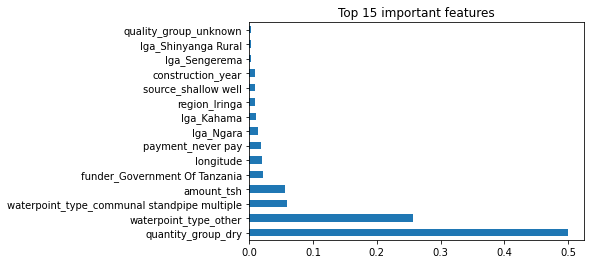

quantity_group_dry                             0.500001
waterpoint_type_other                          0.257199
waterpoint_type_communal standpipe multiple    0.060040
amount_tsh                                     0.055578
funder_Government Of Tanzania                  0.021058
longitude                                      0.019593
payment_never pay                              0.017798
lga_Ngara                                      0.014082
lga_Kahama                                     0.010030
region_Iringa                                  0.009574
source_shallow well                            0.009423
construction_year                              0.009417
lga_Sengerema                                  0.003254
lga_Shinyanga Rural                            0.002565
quality_group_unknown                          0.002214
dtype: float64


In [119]:
#feature importance 
feat_importances = pd.Series(tree_clf.feature_importances_, index=data.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show() 
print(feat_importances.nlargest(15))

## 7.2 Bagged Tree Model 
The purpose of this model is to begin to generate diversity in the model

In [120]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [121]:
#training accuracy
bgm = bagged_tree.fit(data_train, target_train)

In [122]:
pred = bagged_tree.predict(data_test)

In [123]:
# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[7691   31  376]
 [ 882   82  110]
 [2848   19 2811]]
                         precision    recall  f1-score   support

             functional       0.67      0.95      0.79      8098
functional needs repair       0.62      0.08      0.14      1074
         non functional       0.85      0.50      0.63      5678

               accuracy                           0.71     14850
              macro avg       0.72      0.51      0.52     14850
           weighted avg       0.74      0.71      0.68     14850



In [124]:
#test accuracy
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 71.27%


There is a 1% increase in accuracy with a bagged tree model as compared to our baseline model.

In [125]:
# get importance
importance = tree_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) 
    feat_importances = pd.Series(tree_clf.feature_importances_, index=data.columns)

Feature: 0, Score: 0.05558
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01959
Feature: 3, Score: 0.00061
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00942
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

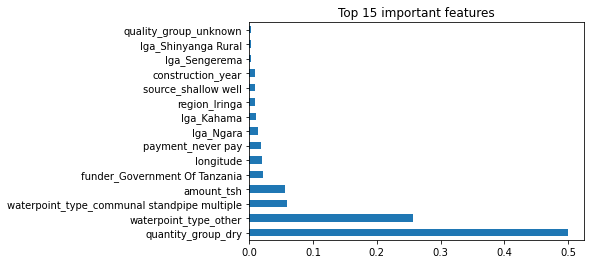

quantity_group_dry                             0.500001
waterpoint_type_other                          0.257199
waterpoint_type_communal standpipe multiple    0.060040
amount_tsh                                     0.055578
funder_Government Of Tanzania                  0.021058
longitude                                      0.019593
payment_never pay                              0.017798
lga_Ngara                                      0.014082
lga_Kahama                                     0.010030
region_Iringa                                  0.009574
source_shallow well                            0.009423
construction_year                              0.009417
lga_Sengerema                                  0.003254
lga_Shinyanga Rural                            0.002565
quality_group_unknown                          0.002214
dtype: float64


In [126]:
#feature importance 
feat_importances = pd.Series(tree_clf.feature_importances_, index=data.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show() 
print(feat_importances.nlargest(15))

## 7.3 Random Forest Model 
The purpose of this model is to look at a random forest ensemble.

In [128]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

In [129]:
# Training accuracy score
forest.score(data_train, target_train)

0.5525701459034792

In [130]:
# Test accuracy score
forest.score(data_test, target_test)

0.5546801346801347

In [133]:
pred = forest.predict(data_test)

In [134]:
# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[8098    0    0]
 [1074    0    0]
 [5539    0  139]]
                         precision    recall  f1-score   support

             functional       0.55      1.00      0.71      8098
functional needs repair       0.00      0.00      0.00      1074
         non functional       1.00      0.02      0.05      5678

               accuracy                           0.55     14850
              macro avg       0.52      0.34      0.25     14850
           weighted avg       0.68      0.55      0.41     14850



In [135]:
#test accuracy
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Random Forest Classifier: 55.47%


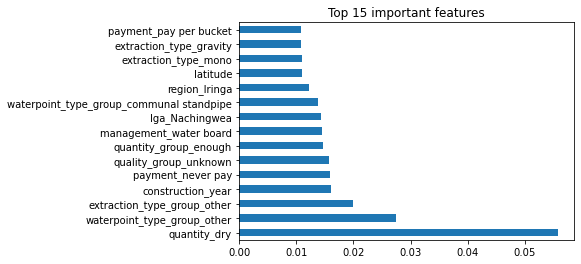

quantity_dry                                0.055785
waterpoint_type_group_other                 0.027480
extraction_type_group_other                 0.020005
construction_year                           0.016137
payment_never pay                           0.015959
quality_group_unknown                       0.015817
quantity_group_enough                       0.014715
management_water board                      0.014445
lga_Nachingwea                              0.014334
waterpoint_type_group_communal standpipe    0.013776
region_Iringa                               0.012181
latitude                                    0.010954
extraction_type_mono                        0.010933
extraction_type_gravity                     0.010839
payment_pay per bucket                      0.010790
dtype: float64


In [136]:
#feature importance 
feat_importances = pd.Series(forest.feature_importances_, index=data.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show() 
print(feat_importances.nlargest(15))

In [138]:
#cross validation scores
dt_cv_score = cross_val_score(forest, data_train, target_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 57.03%


In [139]:
#graph feature importance in matplotlib 
import plotly.graph_objects as go
fig = go.Figure(data= go.Scatterpolar( r = [0.043657, 0.036516, 0.034402, 0.034402, 0.030081, 0.026957, 0.021367, 
                                           0.020473, 0.018562, 0.017348, 0.016855, 0.016196, 0.015702, 0.015683, 
                                           0.015683, 0.014704, 0.014172],
        theta = ["quantity_group_dry","extraction_type_class_other", "waterpoint_type_group_other", 
                 "water_quality_unknown", "waterpoint_type_other", "wpt_name_none", "extraction_type_group_other", 
                 "extraction_type_gravity", "extraction_type_other", "extraction_type_group_nira/tanira", 
                 "construction_year", "region_code", "quantity_group_enough", "management_vwc",
                 "waterpoint_type_hand pump"]))

fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
      radialaxis_angle = -45,
      angularaxis = dict(
        direction = "clockwise",
        period = 6)
    )) 
fig.update_layout(title_text="Top 10 Most Important Features")

fig.show()

The random forest preformed signifigantly worse that the bagged tree model. 